# Ejercicio 2

<img src="figg/eje2.png" width="300">

El siguiente circuito corresponde a un adaptador de impedancias realizado con un trasformador, cuyo  $Q_{oL} = \infty$  , y un capacitor de $ C_1$ conectado en paralelo con el primario, cuyas pérdidas se suponen despreciables. 

La impedancia interna de la fuente es de $$z_g= (200-j10) \Omega $$ a $200MHz$ y su potencia disponible es de $P_{disp} = 10 nW$. 

La resistencia de carga es de $R_L = 1000 \Omega$.


Nota: en SPICE la sentencia ``k1 L1 L2 1'' indica que el transformador tiene $K = 1$ (acople máximo).


    1. Para $Q_c= 20$ a $200MHz$: $C$, $Lp$, $Ls$ y la relación de vueltas del transformador.
    2. Tensión en el primario y secundario y potencia sobre $R_L$.   
    3. Verificar utilizando simuladores.

## Respuestas

### 1. Para $Q_c= 20$ a $200MHz$: $C$, $Lp$, $Ls$ y la relación de vueltas del transformador.
    a1) Lp= 3.99e-09 Hy
    a2) Ls= 1.99e-08 Hy
    a3) C1= 1.586e-10 F
    a4) N = 2.23 

### 2. Tensión en el primario y secundario y potencia sobre $R_L$.

    b1) vs = 1.41e-04 V
    b2) vp = 6.33e-05 V
    b3) PRL= 1.00e-11 W

### 3. Verificar utilizando simuladores.

<img src="figg/eje2sim.png" width="500">

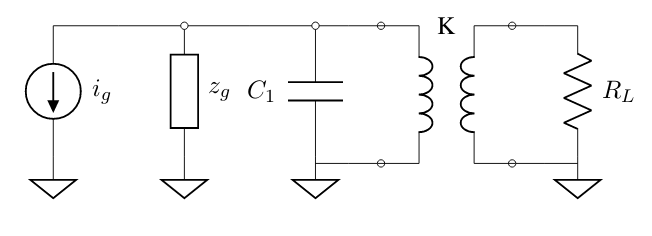

In [3]:
import numpy as np
from IPython.display import Image

Image(filename= "fig/eje2.png",width=350)

In [6]:
# Datos
Pdisp =  10e-12
Qc = 20
Qo = np.inf
zg = 200-10j  
fo  =  200e6
RL  = 1000

wo = 2*np.pi*fo

# Calculo la impedancia de la fuente para el modelo paralelo
# Generador
rg =  zg.real
cg = -1/(zg.imag*wo)

# Convesión de serie a paralelo del generador
# Qmg = wo*cg/rg
Qmg  = 1/(wo*cg*rg)

rgp  = rg*(1+Qmg**2)
cgp  = cg/(1+1/Qmg**2)
print('rg =  {:1.1f} ohms'.format(rgp) )
print('cg =  {:1.3e} F'.format(cgp) )


#rgp = 1/((1/zg).real )
#cgp  = ( (1/zg).imag )/wo 
#print('rg =  {:1.1f} ohms'.format(rgp) )
#print('cg =  {:1.3e} F'.format(cgp) )


rg =  200.5 ohms
cg =  1.984e-13 F


In [3]:
#a)

# Buscamos que la resistencia de carga se vea desde el primario como RLp = rg para que este adaptado para MTEQcte.
RLp   = rg  

# La relación de espiras del transformador  (Sec/Pri)
N  = (RL/RLp)**0.5

# Calculo la resistencia externa a las perdidas
Rext  = rg * RLp / (rg + RLp )

# La inductancia del primario entonces
Lp =  (1/Qc - 1/Qo)  * Rext / wo
# La inductancia del secundario (k= 1)
Ls  = Lp * N**2


# La capacidad que sintoniza con Lp
Ct  =  1/ Lp / (wo)**2  

# El valor de C1 ya que esta en paralelo con la capacidad que presenta la impedancia de la fuente
C1 = (Ct - cg)


print('a1) Lp= {:2.2e} Hy'.format(Lp) ) 
print('a2) Ls= {:2.2e} Hy'.format(Ls) ) 
print('a3) C1= {:2.3e} F'.format(C1) ) 
print('a4) N = {:2.2f} '.format(N) ) 



a1) Lp= 3.99e-09 Hy
a2) Ls= 1.99e-08 Hy
a3) C1= 1.586e-10 F
a4) N = 2.23 


In [4]:
#b)
# La potencia sobre la carga se calcula como:
PRL = Pdisp * (1 - Qc/Qo)**2

# La tensión sobre RL (secundario), :
vs  = (PRL*2*RL)**0.5

# La tensión en los bornes del primario 
vp = vs/N

print('b1) vs = {:2.2e} V'.format(vs) ) 
print('b2) vp = {:2.2e} V'.format(vp) ) 
print('b3) PRL= {:2.2e} W'.format(PRL) ) 

b1) vs = 1.41e-04 V
b2) vp = 6.33e-05 V
b3) PRL= 1.00e-11 W


In [8]:
# Calculo de la fuente de corriente

# La corriente de la fuente se calcula como:
# La potenicia disponible es la mitad de la que entrega la fuente a una carga totalmente adaptada.
igpico  = (Pdisp *8 / rgp )**0.5  # PICO


# NOTA: La potencia disponible es la que se desarrolla en la carga cuando esta adaptada para 
# máxima transferencia de energía (o sea que la impedancia de carga de la fuente es rg, 50ohms )
# En el caso del ejercicio, el adaptador presenta 33 ohms ya que se calculó para MTE a Qcte!

print('igpico =  {:1.3e} A'.format(igpico) )

igpico =  6.317e-07 A


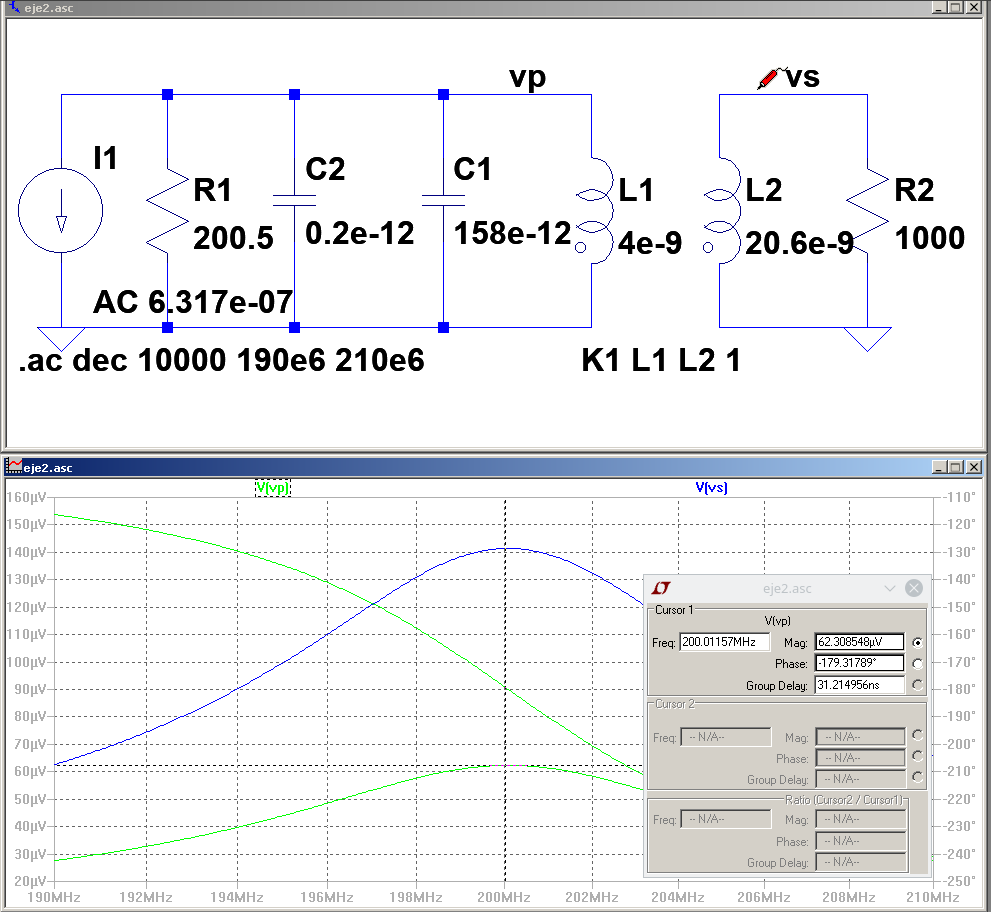

In [6]:
Image(filename= "fig/eje2sim.png",width=750)

## Revisar que las perdidas de los componentes sea despresiables!

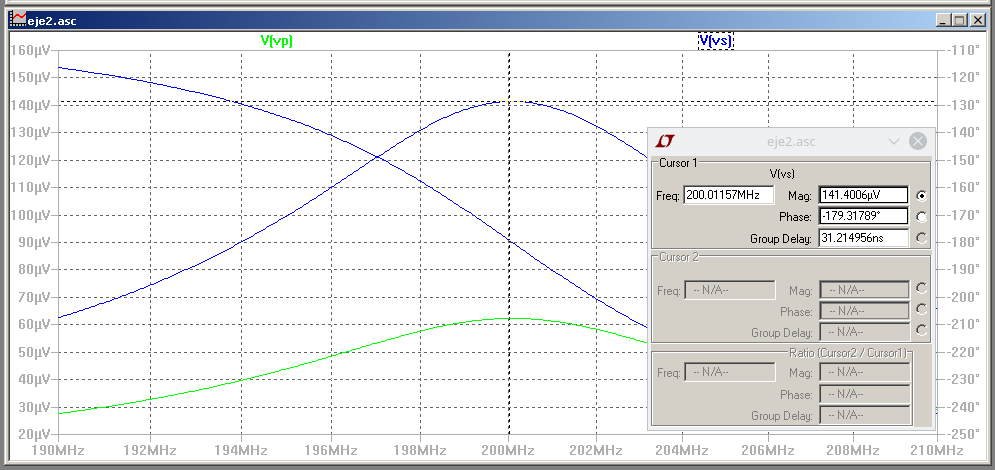

In [7]:
Image(filename= "fig/eje2sim2.png",width=750)